This is the unkept notebook from this class, that was typed as a codealong.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
df = pd.read_csv('../data/titanic.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [21]:
df.family_size = df['SibSp'] + df['Parch']

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [25]:
df['old_young'] = np.where(df['Age'] > 35, 'Old', 'Young')

In [29]:
df[['old_young', 'Age']].head()

,old_young,Age
0,Young,22.0
1,Old,38.0
2,Young,26.0
3,Young,35.0
4,Young,35.0


In [39]:
conditions = [
    (df['Sex'] == 'male') & (df['Age'] >= 35),
    (df['Sex'] == 'male') & (df['Age'] < 35),
    (df['Sex'] == 'female') & (df['Age'] >= 35),
    (df['Sex'] == 'female') & (df['Age'] < 35)
]
results = [
    'M-Old',
    'M-Young',
    'F-Old',
    'F-Young'
]

df['Age_Status'] = np.select(conditions, results, 'Other')

In [57]:
%timeit df['Age_Status'] = np.select(conditions, results, 'Other')

241 µs ± 17.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [40]:
df['Age_Status'].value_counts()

M-Young    299
F-Young    180
Other      177
M-Old      154
F-Old       81
Name: Age_Status, dtype: int64

In [41]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
new_vals = {
    'S': 1, 
    'C': 2,
    'Q': 3
}

df['Embarked'] = df['Embarked'].map(new_vals)

In [43]:
df['Embarked'].value_counts()

1.0    644
2.0    168
3.0     77
Name: Embarked, dtype: int64

In [47]:
df['ticket_type'] = pd.cut(df['Fare'], bins=[0, 15, 65, 513], labels=['economy', 'business', 'vip'])

In [48]:
df[['ticket_type', 'Fare']].head(10)

,ticket_type,Fare
0,economy,7.2500
1,vip,71.2833
2,economy,7.9250
3,business,53.1000
4,economy,8.0500
5,economy,8.4583
6,business,51.8625
7,business,21.0750
8,economy,11.1333
9,business,30.0708


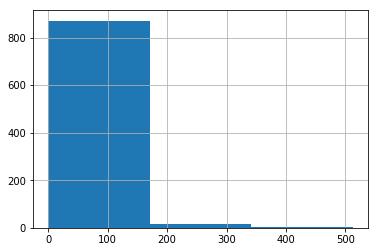

In [50]:
df['Fare'].hist(bins=3)

In [55]:
def some_function(age):
    if age % 2 == 0:
        return 'even'
    else:
        return 'odd'
    
df['odd_even_age'] = df['Age'].apply(some_function)

In [58]:
def some_function(row):
    if row['Sex'] == 'male' and row['Age'] >= 35:
        return 'M-Old'
    elif row['Sex'] == 'male' and row['Age'] < 35:
        return 'M-Young'
    elif row['Sex'] == 'female' and row['Age'] >= 35:
        return 'F-Old'
    elif row['Sex'] == 'female' and row['Age'] < 35:
        return 'F-Young'
    else:
        'Other'

In [59]:
%timeit df['Age-Status'] = df.apply(some_function, axis=1)

59.9 ms ± 627 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [61]:
df['Name'].str.split()

0                           [Braund,, Mr., Owen, Harris]
1      [Cumings,, Mrs., John, Bradley, (Florence, Bri...
2                             [Heikkinen,, Miss., Laina]
3      [Futrelle,, Mrs., Jacques, Heath, (Lily, May, ...
4                          [Allen,, Mr., William, Henry]
5                                   [Moran,, Mr., James]
6                           [McCarthy,, Mr., Timothy, J]
7                    [Palsson,, Master., Gosta, Leonard]
8      [Johnson,, Mrs., Oscar, W, (Elisabeth, Vilhelm...
9              [Nasser,, Mrs., Nicholas, (Adele, Achem)]
10                  [Sandstrom,, Miss., Marguerite, Rut]
11                          [Bonnell,, Miss., Elizabeth]
12                   [Saundercock,, Mr., William, Henry]
13                      [Andersson,, Mr., Anders, Johan]
14            [Vestrom,, Miss., Hulda, Amanda, Adolfina]
15                 [Hewlett,, Mrs., (Mary, D, Kingcome)]
16                              [Rice,, Master., Eugene]
17                     [William